라이브러리 임포트

In [1]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable


In [2]:
## library import - data preprocessing
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder

In [3]:
!pip install --upgrade typing_extensions
!pip install --upgrade torch

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
## BERT embedding 
from transformers import BertTokenizer, BertModel
import torch 

In [5]:
## Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [6]:
!pip show scikit-learn
!pip install --upgrade scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause License
         
         Copyright (c) 2007-2024 The scikit-learn developers.
         All rights reserved.
         
         Redistribution and use in source and binary forms, with or without
         modification, are permitted provided that the following conditions are met:
         
         * Redistributions of source code must retain the above copyright notice, this
           list of conditions and the following disclaimer.
         
         * Redistributions in binary form must reproduce the above copyright notice,
           this list of conditions and the following disclaimer in the documentation
           and/or other materials provided with the distribution.
         
         * Neither the name of the copyright holder nor the names of its
           contributors may be used to endorse or promote products deri

In [7]:
## 평가 지표 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from scipy.stats import spearmanr

In [8]:
## visualization
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [9]:
import matplotlib.font_manager as fm

# 한글 폰트 설정 (윈도우용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

In [10]:
# tqdm 
from tqdm import tqdm 

In [11]:
# kaggle hub
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [12]:
## GPU check
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("사용 중인 디바이스:", device)

사용 중인 디바이스: cpu


In [13]:
print("CUDA 사용 가능?", torch.cuda.is_available())
if torch.cuda.is_available():
    print("사용 중인 GPU:", torch.cuda.get_device_name(0))
else:
    print("GPU를 사용할 수 없습니다.")

CUDA 사용 가능? False
GPU를 사용할 수 없습니다.


데이터 로드

In [14]:
pip install kagglehub[pandas-datasets]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
# Download latest version
path = kagglehub.dataset_download("datasnaek/youtube-new")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\datasnaek\youtube-new\versions\115


In [16]:
# load USvideo Dataset
df = pd.read_csv(os.path.join(path, "USvideos.csv"))

In [17]:
# data 확인
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [18]:
# 데이터 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

data processing
Null/duplicate check

In [19]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [20]:
# 중복 확인 
df.duplicated().sum()

48

In [21]:
# 중복된 행 확인 
df[df.duplicated()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
34899,QBL8IRJ5yHU,18.15.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",1469627,188652,3124,33032,https://i.ytimg.com/vi/QBL8IRJ5yHU/default.jpg,False,False,False,I will never be able to say Thank You enough.....
34900,t4pRQ0jn23Q,18.15.05,YoungBoy Never Broke Again Goes Sneaker Shoppi...,Complex,24,2018-05-14T14:00:03.000Z,"sneakerhead|""complex""|""complex originals""|""sne...",1199587,49709,2380,7261,https://i.ytimg.com/vi/t4pRQ0jn23Q/default.jpg,False,False,False,YoungBoy Never Broke Again goes Sneaker Shoppi...
34901,j4KvrAUjn6c,18.15.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",3906727,77378,12160,15874,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
34902,MAjY8mCTXWk,18.15.05,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...",杰威爾音樂 JVR Music,10,2018-05-14T15:59:47.000Z,"周杰倫|""Jay""|""Chou""|""周董""|""周杰伦""|""周傑倫""|""杰威尔""|""周周""|""...",916128,40485,1042,4746,https://i.ytimg.com/vi/MAjY8mCTXWk/default.jpg,False,False,False,詞：周杰倫、宋健彰（彈頭） 曲：周杰倫憂鬱型男的走心旋律 用英式搖滾宣洩情傷不愛我就拉倒...
34903,xhs8tf1v__w,18.15.05,Terry Crews Answers the Web's Most Searched Qu...,WIRED,24,2018-05-14T16:00:29.000Z,"autocomplete|""deadpool 2""|""google autocomplete...",343967,16988,132,1308,https://i.ytimg.com/vi/xhs8tf1v__w/default.jpg,False,False,False,Terry Crews takes the WIRED Autocomplete Inter...
34904,E21NATEP9QI,18.15.05,Why Stradivarius violins are worth millions,Vox,25,2018-05-14T12:00:03.000Z,"vox.com|""vox""|""explain""|""stradivarius""|""violin...",433833,12356,307,1129,https://i.ytimg.com/vi/E21NATEP9QI/default.jpg,False,False,False,Many musicians prefer these 300-year-old instr...
34905,jzLlsbdrwQk,18.15.05,"$17 Pet vs. $100,000 Pet",BuzzFeedBlue,22,2018-05-13T15:00:57.000Z,"buzzfeed|""worth it""|""cheap vs. expensive""|""ste...",3081033,60379,6857,7796,https://i.ytimg.com/vi/jzLlsbdrwQk/default.jpg,False,False,False,“Who is Lennox and why is he so special?”Credi...
34906,1RZYOeQeIXE,18.15.05,Sarah Paulson Gets Scared During '5 Second Rule',TheEllenShow,24,2018-05-14T13:00:00.000Z,"ellen|""ellen degeneres""|""the ellen show""|""seas...",704786,19880,248,669,https://i.ytimg.com/vi/1RZYOeQeIXE/default.jpg,False,False,False,Sarah Paulson agreed to play a friendly game o...
34907,WF82ABLw8s4,18.15.05,Gabby Barrett Sings I Have Nothing by Whitney ...,American Idol,24,2018-05-14T02:23:01.000Z,"ABC|""americanidol""|""idol""|""american idol""|""rya...",735031,11734,1468,1870,https://i.ytimg.com/vi/WF82ABLw8s4/default.jpg,False,False,False,Gabby Barrett sings I Have Nothing by Whitney ...
34908,r-3iathMo7o,18.15.05,"The ULTIMATE $30,000 Gaming PC Setup",Unbox Therapy,28,2018-05-13T19:00:25.000Z,"gaming setup|""gaming""|""setup""|""fortnite""|""fort...",4700460,103430,8028,13293,https://i.ytimg.com/vi/r-3iathMo7o/default.jpg,False,False,False,"Fortnite, PUBG, Far Cry 5? Which game would yo..."


category mapping

In [22]:
## 카테고리 매핑 
# JSON 파일 경로
json_path = os.path.join(path, "US_category_id.json")

# JSON 로드
with open(json_path, 'r', encoding='utf-8') as f:
    category_json = json.load(f)

# 카테고리 매핑 딕셔너리 생성
category_mapping = {
    int(item['id']): item['snippet']['title']
    for item in category_json['items']
}

In [23]:
# 매핑 딕셔너리 확인
print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [24]:
df['category_name'] = df['category_id'].map(category_mapping)

In [25]:
df['category_name']

0          People & Blogs
1           Entertainment
2                  Comedy
3           Entertainment
4           Entertainment
               ...       
40944      Pets & Animals
40945      People & Blogs
40946       Entertainment
40947    Film & Animation
40948              Gaming
Name: category_name, Length: 40949, dtype: object

target log-scaling

In [26]:
# log-scaling 진행
df['log_views'] = np.log1p(df['views'])

Modeling #1. category_id를 feature로 포함

In [27]:
# category를 포함한 열 불러오기 
category_df = df[['title', 'log_views', 'category_id']]
category_df

,title,log_views,category_id
0,WE WANT TO TALK ABOUT OUR MARRIAGE,13.525659,22
1,The Trump Presidency: Last Week Tonight with J...,14.698775,24
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",14.975981,23
3,Nickelback Lyrics: Real or Fake?,12.745978,24
4,I Dare You: GOING BALD!?,14.555413,24
...,...,...,...
40944,The Cat Who Caught the Laser,14.337638,15
40945,True Facts : Ant Mutualism,13.878297,22
40946,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,13.879848,24
40947,How Black Panther Should Have Ended,15.549078,1


In [28]:
# BERT load 
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [29]:
# BERT embedding extract 

## CLS 벡터 추출 함수 정의 

def extract_cls_embedding(text):
    encoding = tokenizer(text,
                         max_length=32,
                         truncation=True,
                         padding='max_length',
                         return_tensors='pt')
    input_ids_tensor = encoding['input_ids'].to(device)
    attention_mask_tensor = encoding['attention_mask'].to(device)
    
    with torch.no_grad():
        outputs = model(input_ids=input_ids_tensor, attention_mask=attention_mask_tensor)
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
    return cls_embedding

In [ ]:
## 전체 제목을 cls로 추출 
embeddings = np.array([
    extract_cls_embedding(title) for title in tqdm(category_df['title'])
])

In [31]:
import numpy as np
embeddings = np.load("title_cls_embeddings.npy")

In [32]:
# category one-hot encoding

ohe = OneHotEncoder(sparse_output=False)
X_category = ohe.fit_transform(category_df[['category_id']])

In [33]:
# 두 피처 결합
X = np.hstack([embeddings, X_category])

# target 처리
y = category_df['log_views']

# test, train dataset 분리 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [34]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [35]:
# Model 성능 평가 함수 
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    spearman_corr, _ = spearmanr(y_test, y_pred)

    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"Spearman: {spearman_corr:.4f}")
    
    return model, rmse, r2, spearman_corr

In [36]:
# Linear Regression 
lr = LinearRegression()
evaluate_model(lr, X_train, y_train, X_test, y_test)

RMSE: 1.4297
R²: 0.3080
Spearman: 0.5323


(LinearRegression(),
 1.4296793504887015,
 0.3079661447873234,
 0.5323444279673469)

In [37]:
ridge = Ridge(alpha=1.0)
evaluate_model(ridge, X_train, y_train, X_test, y_test)

RMSE: 1.4295
R²: 0.3082
Spearman: 0.5324


(Ridge(), 1.4294721896844862, 0.3081666819264097, 0.5323679158786981)

In [38]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
evaluate_model(rf, X_train, y_train, X_test, y_test)

RMSE: 0.5294
R²: 0.9051
Spearman: 0.9568


(RandomForestRegressor(n_jobs=-1, random_state=42),
 0.5293547390980433,
 0.9051267751037889,
 0.9567961903516473)

In [39]:
gradient = GradientBoostingRegressor(n_estimators=100, random_state=42)
evaluate_model(gradient, X_train, y_train, X_test, y_test)

RMSE: 1.3688
R²: 0.3656
Spearman: 0.6243


(GradientBoostingRegressor(random_state=42),
 1.368826395276137,
 0.3656239264096849,
 0.6243027383317948)

Modeling#2 category별 Model 구축

category 선정

In [40]:
# category별 데이터 수 확인 
category_counts = df['category_name'].value_counts().sort_values(ascending=True)

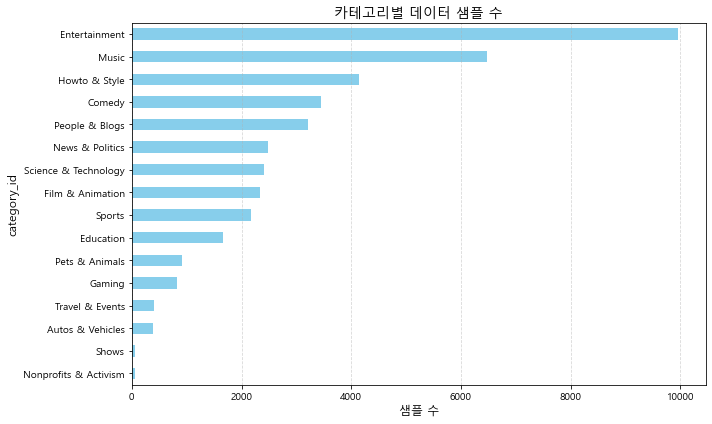

In [41]:
plt.figure(figsize=(10, 6))
category_counts.plot(kind='barh', color='skyblue')

plt.title("카테고리별 데이터 샘플 수", fontsize=14)
plt.xlabel("샘플 수", fontsize=12)
plt.ylabel("category_id", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [42]:
# BERT embedding에 category 결합
category_df['title_embedding'] = list(embeddings)

C:\Users\user\AppData\Local\Temp\ipykernel_21216\3614589385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['title_embedding'] = list(embeddings)


Music

In [43]:
# category filtering
cat_name = "Music"
group = category_df[category_df['category_id'] == 10]

X = np.vstack(group['title_embedding'].values)
y = group['log_views']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Music - Lasso

In [48]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Lasso 모델 정의
alpha_value = 0.0001
lasso = Lasso(alpha=alpha_value)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan

# 출력
print("Category:", cat_name)
print("Model: Lasso")
print("Alpha:", alpha_value)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장 
lasso_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "Lasso",
    "Alpha": alpha_value,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Music
Model: Lasso
Alpha: 0.0001
RMSE: 0.8233
R²: 0.8078
Spearman: 0.9095


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.309e+02, tolerance: 1.841e+00
  model = cd_fast.enet_coordinate_descent(


Music - Linear Regression

In [50]:
# LinearRegression 모델 정의 및 학습
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan

# 출력
print("Category:", cat_name)
print("Model: LinearRegression")
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장
linear_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "LinearRegression",
    "Alpha": None,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Music
Model: LinearRegression
RMSE: 1.22
R²: 0.578
Spearman: 0.9273


Music - Ridge

In [56]:
# Ridge 모델 정의 및 학습
alpha_value = 1.0
ridge = Ridge(alpha=alpha_value)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan


# 출력
print("Category:", cat_name)
print("Model: Ridge")
print("Alpha:", alpha_value)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장
ridge_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "Ridge",
    "Alpha": alpha_value,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Music
Model: Ridge
Alpha: 1.0
RMSE: 0.8308
R²: 0.8043
Spearman: 0.8949


Music - RF

In [57]:
# RF 모델 정의 및 학습
n_estimators = 100
rf = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan

# 출력
print("Category:", cat_name)
print("Model: RandomForest")
print("n_estimators:", n_estimators)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장
rf_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "RandomForest",
    "Alpha": None,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Music
Model: RandomForest
n_estimators: 100
RMSE: 0.571
R²: 0.9076
Spearman: 0.9491


Music - Gradient

In [58]:
# Gradient Boosting 모델 정의 및 학습
n_estimators = 100
gbr = GradientBoostingRegressor(n_estimators=n_estimators, random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan


# 출력
print("Category:", cat_name)
print("Model: GradientBoosting")
print("n_estimators:", n_estimators)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장
gbr_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "GradientBoosting",
    "Alpha": None,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Music
Model: GradientBoosting
n_estimators: 100
RMSE: 0.8463
R²: 0.7969
Spearman: 0.9124


In [59]:
# 모델별 결과 DataFrame 합치기
all_results = pd.concat([
    lasso_results_df,
    linear_results_df,
    ridge_results_df,
    rf_results_df,
    gbr_results_df
], ignore_index=True)

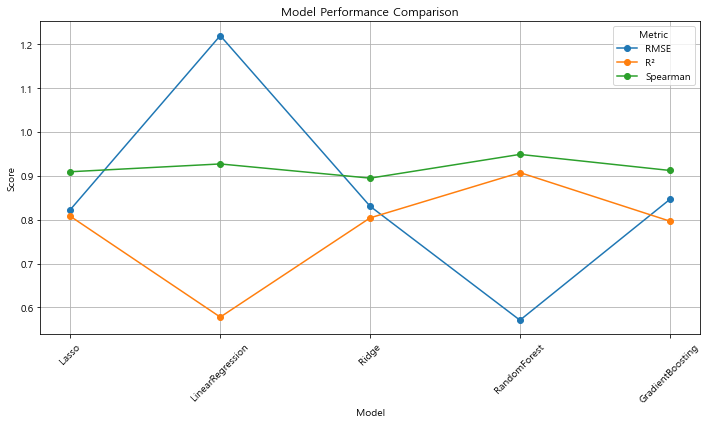

In [60]:
# 시각화를 위한 변환 (wide → long)
results_long = all_results.melt(
    id_vars="Model", 
    value_vars=["RMSE", "R²", "Spearman"],
    var_name="Metric", 
    value_name="Score"
)

# 선 그래프(line chart)로 시각화
plt.figure(figsize=(10, 6))
for metric in results_long["Metric"].unique():
    subset = results_long[results_long["Metric"] == metric]
    plt.plot(subset["Model"], subset["Score"], marker='o', label=metric)

plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.grid(True)
plt.tight_layout()
plt.show()

Howto & Style

In [61]:
# category filtering
cat_name = "Howto & Style"
group = category_df[category_df['category_id'] == 26]

X = np.vstack(group['title_embedding'].values)
y = group['log_views']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Howto & Style - Lasso

In [63]:
# Lasso 모델 정의
alpha_value = 0.0001
lasso = Lasso(alpha=alpha_value)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan


# 출력
print("Category:", cat_name)
print("Model: Lasso")
print("Alpha:", alpha_value)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장 
lasso_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "Lasso",
    "Alpha": alpha_value,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Howto & Style
Model: Lasso
Alpha: 0.0001
RMSE: 0.5579
R²: 0.829
Spearman: 0.9421


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.202e+02, tolerance: 5.771e-01
  model = cd_fast.enet_coordinate_descent(


Howto & Style - Linear Regression

In [64]:
# LinearRegression 모델 정의 및 학습
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan


# 출력
print("Category:", cat_name)
print("Model: LinearRegression")
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장
linear_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "LinearRegression",
    "Alpha": None,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Howto & Style
Model: LinearRegression
RMSE: 0.577
R²: 0.8171
Spearman: 0.9453


Howto & Style - Ridge

In [65]:
# Ridge 모델 정의 및 학습
alpha_value = 1.0
ridge = Ridge(alpha=alpha_value)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan


# 출력
print("Category:", cat_name)
print("Model: Ridge")
print("Alpha:", alpha_value)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장
ridge_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "Ridge",
    "Alpha": alpha_value,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Howto & Style
Model: Ridge
Alpha: 1.0
RMSE: 0.5708
R²: 0.821
Spearman: 0.9352


Howto & Style - RF

In [66]:
# RF 모델 정의 및 학습
n_estimators = 100
rf = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan


# 출력
print("Category:", cat_name)
print("Model: RandomForest")
print("n_estimators:", n_estimators)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장
rf_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "RandomForest",
    "Alpha": None,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Howto & Style
Model: RandomForest
n_estimators: 100
RMSE: 0.4219
R²: 0.9022
Spearman: 0.9645


Howto & Style - Gradient

In [67]:
# Gradient Boosting 모델 정의 및 학습
n_estimators = 100
gbr = GradientBoostingRegressor(n_estimators=n_estimators, random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan


# 출력
print("Category:", cat_name)
print("Model: GradientBoosting")
print("n_estimators:", n_estimators)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장
gbr_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "GradientBoosting",
    "Alpha": None,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Howto & Style
Model: GradientBoosting
n_estimators: 100
RMSE: 0.6114
R²: 0.7947
Spearman: 0.9194


In [68]:
# 모델별 결과 DataFrame 합치기
all_results = pd.concat([
    lasso_results_df,
    linear_results_df,
    ridge_results_df,
    rf_results_df,
    gbr_results_df
], ignore_index=True)

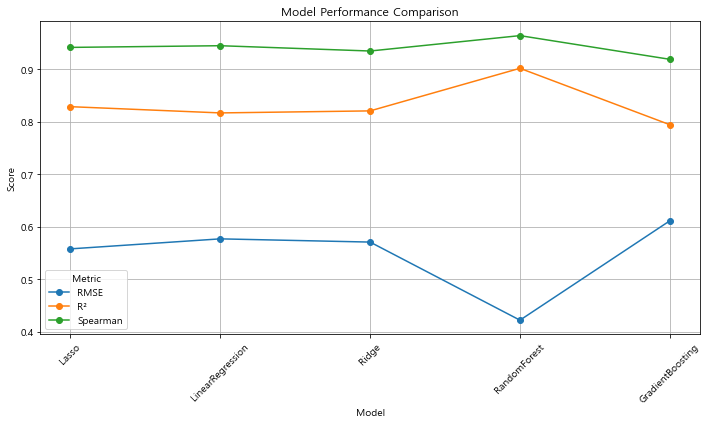

In [69]:
# 시각화를 위한 변환 (wide → long)
results_long = all_results.melt(
    id_vars="Model", 
    value_vars=["RMSE", "R²", "Spearman"],
    var_name="Metric", 
    value_name="Score"
)

# 선 그래프(line chart)로 시각화
plt.figure(figsize=(10, 6))
for metric in results_long["Metric"].unique():
    subset = results_long[results_long["Metric"] == metric]
    plt.plot(subset["Model"], subset["Score"], marker='o', label=metric)

plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.grid(True)
plt.tight_layout()
plt.show()